Modelling Starbucks Coffee Time Using Markov Chains

Dataset: https://www.kaggle.com/datasets/ashishpatel26/starbucks-menu-nutrition-drinks

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from scipy import stats
import sklearn 
import matplotlib.pyplot as plt

In [2]:
pd.read_csv('C:/PROJECTS/Modelling Starbucks coffee time/dataset/starbucks-menu-nutrition-drinks.csv') 


,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10
...,...,...,...,...,...,...,...
172,Chocolate Smoothie,320,5,53,8,20,170
173,Strawberry Smoothie,300,2,60,7,16,130
174,Ginger Ale,-,-,-,-,-,-
175,Lemon Ale,-,-,-,-,-,-


In [3]:
kind_of_coffee = np.array(pd.read_csv('C:/PROJECTS/Modelling Starbucks coffee time/dataset/starbucks-menu-nutrition-drinks.csv') ['Unnamed: 0'])
p_start = []
for i in range(len(kind_of_coffee)):
    p_start.append(np.random.choice(np.arange(50,100)))
p_start = np.array(np.array(list(np.array(p_start)/sum(p_start)))) 

kind_of_coffee

array(['Cool Lime Starbucks Refreshers™ Beverage', 'Ombré Pink Drink',
       'Pink Drink', 'Strawberry Acai Starbucks Refreshers™ Beverage',
       'Very Berry Hibiscus Starbucks Refreshers™ Beverage',
       'Violet Drink', 'Evolution Fresh™ Cold-Pressed Apple Berry Juice',
       'Evolution Fresh™ Defense Up',
       'Evolution Fresh™ Organic Ginger Limeade', 'Iced Coffee',
       'Iced Coffee with Milk', 'Iced Espresso Classics - Vanilla Latte',
       'Iced Espresso Classics - Caffe Mocha',
       'Iced Espresso Classics - Caramel Macchiato',
       'Starbucks® Caramel Iced Coffee', 'Starbucks® Iced Coffee + Milk',
       'Starbucks® Low Calorie Iced Coffee + Milk',
       'Starbucks® Vanilla Iced Coffee', 'Shaken Sweet Tea',
       'Tazo® Bottled Berry Blossom White', 'Tazo® Bottled Black Mango',
       'Tazo® Bottled Black with Lemon', 'Tazo® Bottled Brambleberry',
       'Tazo® Bottled Giant Peach', 'Tazo® Bottled Iced Passion',
       'Tazo® Bottled Lemon Ginger',
       'Tazo

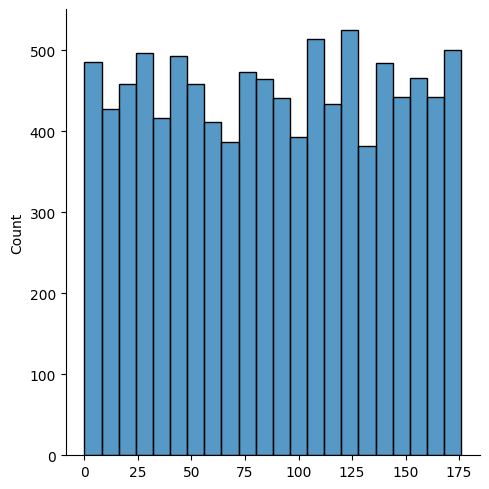

In [4]:
coffe_picked = []
for i in range(10000):
    coffe_picked.append(np.random.choice(range(0,len(kind_of_coffee)),p=p_start))
sns.displot(coffe_picked)

In [5]:
coffee_data = pd.DataFrame(kind_of_coffee,columns=['State 1'])
mu_list = []
var_list = []
for i in range(len(coffee_data)):
    mu_list.append(np.random.choice(np.linspace(3,6,1000)))
    var_list.append(np.random.choice(np.linspace(0.1,1.5,1000)))
coffee_data[r'$\mu$']=mu_list
coffee_data[r'$\sigma$']=var_list
coffee_data[r'$p$'] = p_start
coffee_data.head()

,State 1,$\mu$,$\sigma$,$p$
0,Cool Lime Starbucks Refreshers™ Beverage,4.111111,0.329830,0.006880
1,Ombré Pink Drink,3.456456,0.441942,0.005962
2,Pink Drink,4.183183,0.517618,0.006192
3,Strawberry Acai Starbucks Refreshers™ Beverage,4.420420,0.427928,0.004816
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,5.783784,0.856757,0.004969


In [6]:
customer_state = ['Ordering the coffee','Waiting for your coffee','Leaving']
states = {'O':customer_state[0],'M':customer_state[1],'L':customer_state[2]}

One Customer One Drink 

In [7]:
mu, sigma = 5,1
def one_drink_one_cust():
    start = states['O']
    print(start+'\n')
    ordering_time = 0.5
    first_state = states['M']
    print(first_state+'\n')
    waiting_time = 0
    k = 0
    while k == 0:
        p = stats.norm.cdf(waiting_time, loc=mu, scale=sigma)
        k = np.random.choice([0,1],p = [1-p,p])
        waiting_time = waiting_time+0.5
        if k == 0:
            print('Coffee is brewing... \n')
    print('Your coffee is ready! \n')
    print(states['L']+'\n')
    print('Waiting time is = %.2f'%(waiting_time))
    return waiting_time

In [8]:
one_drink_one_cust()

Ordering the coffee

Waiting for your coffee

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Coffee is brewing... 

Your coffee is ready! 

Leaving

Waiting time is = 5.50


5.5

One  Customer Multiple Drinks

In [9]:
def random_drink_one_cust():
    start = states['O']
    print(start+'\n')
    ordering_time = 0.5
    first_state = states['M']
    chosen_i = np.random.choice(range(0,len(kind_of_coffee)),p=p_start)
    print('Ordering coffee %s'%(kind_of_coffee[chosen_i]))
    print(first_state+'\n')


    mu_i, var_i = coffee_data[r'$\mu$'].loc[chosen_i], coffee_data[r'$\sigma$'].loc[chosen_i]
    waiting_time = 0
    k = 0
    while k == 0:
        p = stats.norm.cdf(waiting_time, loc=mu_i, scale=var_i)
        k = np.random.choice([0,1],p = [1-p,p])
        waiting_time = waiting_time+0.5
    print('Your coffee is ready! \n')
    print(states['L']+'\n')
    #print('Waiting time is = %.2f'%(waiting_time))
    return waiting_time
random_drink_one_cust()

Ordering the coffee

Ordering coffee Iced Cinnamon Dolce Latte
Waiting for your coffee

Your coffee is ready! 

Leaving



6.5

In [10]:
def random_drink_one_cust():
    start = states['O']
    ordering_time = 0.5
    first_state = states['M']
    chosen_i = np.random.choice(range(0,len(kind_of_coffee)),p=p_start)
    mu_i, var_i = coffee_data[r'$\mu$'].loc[chosen_i], coffee_data[r'$\sigma$'].loc[chosen_i]
    waiting_time = 0
    k = 0
    while k == 0:
        p = stats.norm.cdf(waiting_time, loc=mu_i, scale=var_i)
        k = np.random.choice([0,1],p = [1-p,p])
        waiting_time = waiting_time+0.5
    return waiting_time 
random_drink_one_cust()

5.0

Waiting Time

Text(0, 0.5, 'Probability Density Function (PDF)')

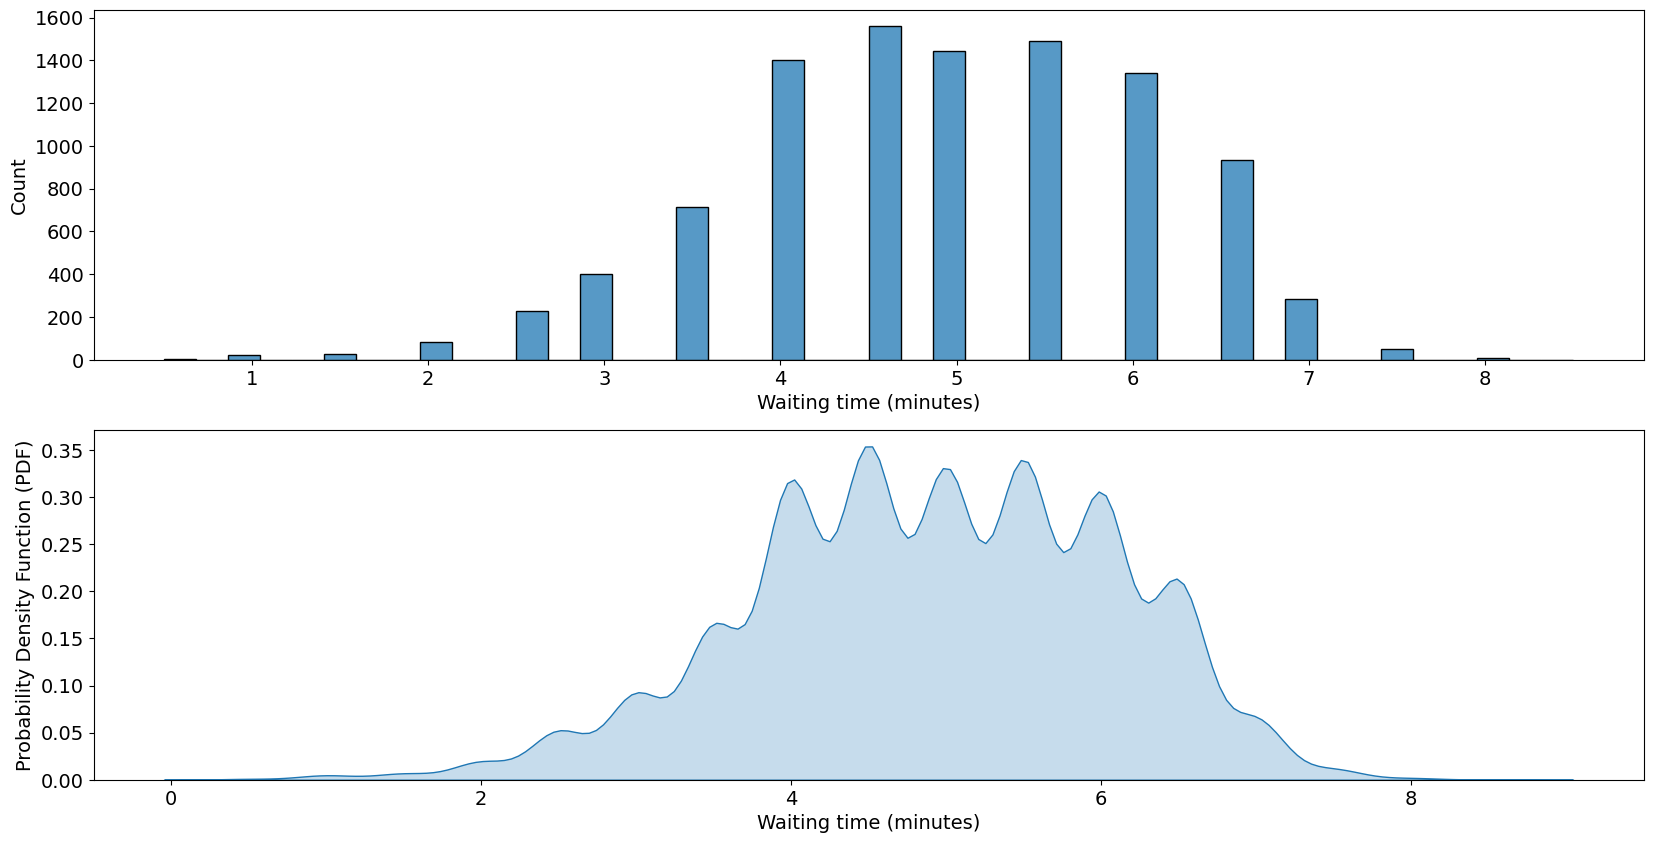

In [11]:
waiting_time_list = []
for i in range(10000):
    waiting_time_list.append(random_drink_one_cust())
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.histplot(waiting_time_list,fill=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Waiting time (minutes)',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.subplot(2,1,2)
sns.kdeplot(waiting_time_list,fill=True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Waiting time (minutes)',fontsize=14)
plt.ylabel('Probability Density Function (PDF)',fontsize=14)

Multiple Customers Multiple Drinks

In [12]:
def random_drink_multiple_cust(cust=2,num_baristas =5):
    time_of_process = []
    baristas = np.zeros(num_baristas)
    q = 0
    ordering_time = 0
    for c in range(cust):
        start = states['O']
        print('Customer number %i is ordering'%(c))
        ordering_time+=0.5
        if sum(baristas)!=num_baristas:
            print('There is at least one free baristas! :)')
            waiting_time = random_drink_one_cust()
            time_of_process.append(waiting_time+ordering_time)
            baristas[q] = 1
            q = q + 1 
        if len(time_of_process)==cust:
            break
        if sum(baristas)==num_baristas:
            print('All the baristas are busy :(')
            print('You have to wait an additional %i minutes until they can start making your coffee' %(min(time_of_process)))
            waiting_time = min(time_of_process)+random_drink_one_cust()+ordering_time
            baristas[num_baristas-1]=0
            time_of_process.append(waiting_time)
            q = q-1
        if len(time_of_process)==cust:
            break
    print('The waiting time for each customer is:')
    print(time_of_process)
    return time_of_process

In [13]:
random_drink_multiple_cust(10,5)

Customer number 0 is ordering
There is at least one free baristas! :)
Customer number 1 is ordering
There is at least one free baristas! :)
Customer number 2 is ordering
There is at least one free baristas! :)
Customer number 3 is ordering
There is at least one free baristas! :)
Customer number 4 is ordering
There is at least one free baristas! :)
All the baristas are busy :(
You have to wait an additional 5 minutes until they can start making your coffee
Customer number 5 is ordering
There is at least one free baristas! :)
All the baristas are busy :(
You have to wait an additional 5 minutes until they can start making your coffee
Customer number 6 is ordering
There is at least one free baristas! :)
All the baristas are busy :(
You have to wait an additional 5 minutes until they can start making your coffee
The waiting time for each customer is:
[5.5, 7.0, 7.5, 9.0, 8.0, 12.0, 9.0, 11.0, 7.5, 15.5]


[5.5, 7.0, 7.5, 9.0, 8.0, 12.0, 9.0, 11.0, 7.5, 15.5]